# Imports

In [84]:
import pandas as pd
import seaborn as sns

In [49]:
pollution_df = pd.read_csv('../data/pollution/3_Concatenated/pollution_merge.csv').copy()
pollution_df

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name
0,2019/01/01 01:00:00+00,NaN,NaN,NaN,NaN,NaN,75001 - Halles
1,2019/01/01 02:00:00+00,NaN,NaN,NaN,NaN,NaN,75001 - Halles
2,2019/01/01 03:00:00+00,NaN,NaN,NaN,NaN,NaN,75001 - Halles
3,2019/01/01 04:00:00+00,NaN,NaN,NaN,NaN,NaN,75001 - Halles
4,2019/01/01 05:00:00+00,NaN,NaN,NaN,NaN,NaN,75001 - Halles
...,...,...,...,...,...,...,...
819595,2022/11/14 20:00:00+00,NaN,27.4,48.6,NaN,NaN,93500 - RN2 Pantin
819596,2022/11/14 21:00:00+00,NaN,NaN,36.8,NaN,NaN,93500 - RN2 Pantin
819597,2022/11/14 22:00:00+00,NaN,NaN,NaN,NaN,NaN,93500 - RN2 Pantin
819598,2022/11/14 23:00:00+00,NaN,NaN,NaN,NaN,NaN,93500 - RN2 Pantin


# Fonctions

In [50]:
 def analyse_df(df, corr_limit = 0.75):
    """Analyse any dataframe and print results
    * Print df Shape, duplicate rows qnt, memory usage, data types and call DataFrame.describe()
    * Check Missing values in each columns, returning qnt. and percentage 
    * Check Linear Correlation between columns, return Pearson number
    Keyword arguments:
    df -- Any DataFrame
    corr_limit -- Correlation Limit (Pearson) to define if relationship exists (default 0.75)
    """   

    print('General Info:')
    print(f'{df.shape[0]} Rows {df.shape[1]} Columns'
          f'\n{df.duplicated().sum()} Duplicated Rows'
          f'\nMemory Usage: {df.memory_usage().sum()/(1024*1024):.2f}Mb')
    
    # Checking Data Types
    int_list, float_list,object_list,bool_list,other_list =[[] for i in range(5)]
    for col in df.columns:
        if df[col].dtype == 'int64':
            int_list.append(col)
        elif df[col].dtype == 'float64':
            float_list.append(col)
        elif df[col].dtype == 'object':
            object_list.append(col)
        elif df[col].dtype == 'boolean':
            bool_list.append(col)
        else:
            other_list.append(col)
            
    for type_list,data_type in zip([int_list, float_list,object_list,bool_list,other_list],
                                   ['int64','float64','object','boolean','other']):
        if len(type_list)>0:
            print(f'\nColumns {data_type}: {type_list}')
            
    # General statistics
    display(round(df.describe(),2))
    
    # Checking Missing Values in each columns
    print('\nCheking Missing Values:')
    col_with_missing_counter = 0
    for col in df.columns:
        qnt_missing = df[col].isna().sum()
        if qnt_missing > 0:
            col_with_missing_counter +=1
            print(f'Column "{col}" has {qnt_missing} missing values ({qnt_missing/df.shape[0]:.2%})')
    if col_with_missing_counter ==0 :
        print('Analyzed DataFrame has no missing values')
        
    # Checking linear correlation between columns
    print('\nChecking Linear Correlation:')
    df_corr = df.corr() # Correlation DataFrame
    ckecked_list =[] # Ensure that we won't print the same information twice
    cols_with_correlation_counter = 0
    for col in df_corr.columns:
        ckecked_list.append(col)
        for i in range(len(df_corr)):
            if ((df_corr[col][i] > corr_limit or df_corr[col][i] < -corr_limit) and
                (df_corr.index[i] not in ckecked_list)):
                cols_with_correlation_counter += 1
                print(f'Linear Correlation found between columns '
                      f'{df_corr.index[i]} and {col} -> Pearson coef. = {df_corr[col][i]:.2f}')         
    if cols_with_correlation_counter == 0:
        print('No linear correlation was found')

# EDA - Concatenated - All years

In [51]:
analyse_df(pollution_df,corr_limit = 0.5)

General Info:
819600 Rows 7 Columns
0 Duplicated Rows
Memory Usage: 43.77Mb

Columns float64: ['PM25', 'PM10', 'NO2', 'O3', 'SO2']

Columns object: ['Date_time', 'Station_name']


,PM25,PM10,NO2,O3,SO2
count,123080.00,382093.00,769382.00,186416.00,97979.00
mean,13.94,25.22,36.61,50.53,1.19
std,9.07,14.75,25.50,28.59,1.25
min,0.00,-0.80,0.00,0.00,0.00
25%,7.90,15.00,17.00,30.40,0.20
50%,11.70,22.20,30.80,50.40,1.00
75%,17.40,32.00,50.50,68.00,1.80
max,193.00,253.00,322.80,237.00,75.90



Cheking Missing Values:
Column "PM25" has 696520 missing values (84.98%)
Column "PM10" has 437507 missing values (53.38%)
Column "NO2" has 50218 missing values (6.13%)
Column "O3" has 633184 missing values (77.26%)
Column "SO2" has 721621 missing values (88.05%)

Checking Linear Correlation:
Linear Correlation found between columns PM10 and PM25 -> Pearson coef. = 0.80
Linear Correlation found between columns NO2 and PM10 -> Pearson coef. = 0.62
Linear Correlation found between columns SO2 and PM10 -> Pearson coef. = 0.57
Linear Correlation found between columns O3 and NO2 -> Pearson coef. = -0.63


/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_74946/2802157580.py:51: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr() # Correlation DataFrame


In [91]:
pollution_df['Date_time'] = pd.to_datetime(pollution_df['Date_time'])
pollution_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819600 entries, 0 to 819599
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   Date_time     819600 non-null  datetime64[ns, UTC]
 1   PM25          123080 non-null  float64            
 2   PM10          382093 non-null  float64            
 3   NO2           769382 non-null  float64            
 4   O3            186416 non-null  float64            
 5   SO2           97979 non-null   float64            
 6   Station_name  819600 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(5), object(1)
memory usage: 43.8+ MB


In [92]:
pollution_df

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name
0,2019-01-01 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75001 - Halles
1,2019-01-01 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75001 - Halles
2,2019-01-01 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75001 - Halles
3,2019-01-01 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75001 - Halles
4,2019-01-01 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75001 - Halles
...,...,...,...,...,...,...,...
819595,2022-11-14 20:00:00+00:00,NaN,27.4,48.6,NaN,NaN,93500 - RN2 Pantin
819596,2022-11-14 21:00:00+00:00,NaN,NaN,36.8,NaN,NaN,93500 - RN2 Pantin
819597,2022-11-14 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,93500 - RN2 Pantin
819598,2022-11-14 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,93500 - RN2 Pantin


In [94]:
pollution_df['year'] = pollution_df.Date_time.dt.year
pollution_df

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,year
0,2019-01-01 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75001 - Halles,2019
1,2019-01-01 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75001 - Halles,2019
2,2019-01-01 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75001 - Halles,2019
3,2019-01-01 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75001 - Halles,2019
4,2019-01-01 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75001 - Halles,2019
...,...,...,...,...,...,...,...,...
819595,2022-11-14 20:00:00+00:00,NaN,27.4,48.6,NaN,NaN,93500 - RN2 Pantin,2022
819596,2022-11-14 21:00:00+00:00,NaN,NaN,36.8,NaN,NaN,93500 - RN2 Pantin,2022
819597,2022-11-14 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,93500 - RN2 Pantin,2022
819598,2022-11-14 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,93500 - RN2 Pantin,2022


In [118]:
df_bricodepot = pollution_df.groupby(by="year").count()
df_bricodepot

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name
year,,,,,,,
2018,161334,16848,72687,153302,33727,32858,161334
2019,165959,18187,67166,152655,35879,33414,165959
2020,175031,24382,89241,165538,40375,29413,175031
2021,167257,26616,82645,158642,38758,2294,167257
2022,150019,37047,70354,139245,37677,0,150019


In [123]:
pollution_df

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,year
0,2019-01-01 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75001 - Halles,2019
1,2019-01-01 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75001 - Halles,2019
2,2019-01-01 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75001 - Halles,2019
3,2019-01-01 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75001 - Halles,2019
4,2019-01-01 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,75001 - Halles,2019
...,...,...,...,...,...,...,...,...
819595,2022-11-14 20:00:00+00:00,NaN,27.4,48.6,NaN,NaN,93500 - RN2 Pantin,2022
819596,2022-11-14 21:00:00+00:00,NaN,NaN,36.8,NaN,NaN,93500 - RN2 Pantin,2022
819597,2022-11-14 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,93500 - RN2 Pantin,2022
819598,2022-11-14 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,93500 - RN2 Pantin,2022


In [129]:
df_test = pollution_df.groupby("year").apply(lambda pollution_df:pollution_df.isna().sum())

<AxesSubplot: ylabel='Count'>

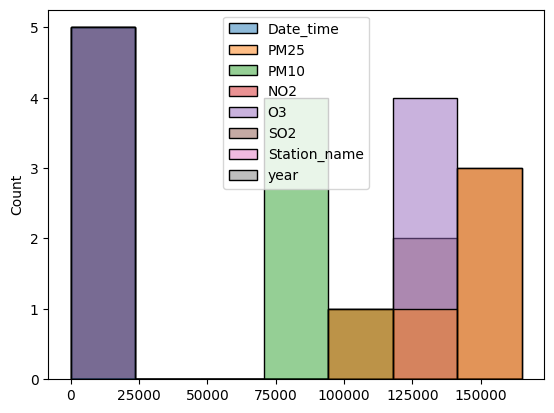

In [131]:
sns.histplot(data=df_test)

# Filtering - Concatenated - Per year

In [69]:
pollution_df_2018 = pollution_df[pollution_df['Date_time'] >= "2018/01/01 <00:00:00+00"]
pollution_df_2018 = pollution_df_2018[pollution_df_2018['Date_time'] < "2019/01/01 00:00:00+00"]
pollution_df_2018

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name
17567,2021/01/02 00:00:00+00,27.8,28.9,NaN,6.8,NaN,75001 - Halles
17568,2021/01/02 01:00:00+00,30.7,29.2,NaN,6.2,NaN,75001 - Halles
17569,2021/01/02 02:00:00+00,29.4,31.4,NaN,6.0,NaN,75001 - Halles
17570,2021/01/02 03:00:00+00,31.3,32.0,NaN,4.7,NaN,75001 - Halles
17571,2021/01/02 04:00:00+00,34.3,34.6,NaN,5.2,NaN,75001 - Halles
...,...,...,...,...,...,...,...
811962,2021/12/31 19:00:00+00,NaN,34.2,67.5,NaN,NaN,93500 - RN2 Pantin
811963,2021/12/31 20:00:00+00,NaN,24.5,44.9,NaN,NaN,93500 - RN2 Pantin
811964,2021/12/31 21:00:00+00,NaN,20.3,28.6,NaN,NaN,93500 - RN2 Pantin
811965,2021/12/31 22:00:00+00,NaN,19.0,25.5,NaN,NaN,93500 - RN2 Pantin


In [70]:
pollution_df_2019 = pollution_df[pollution_df['Date_time'] >= "2019/01/01 <00:00:00+00"]
pollution_df_2019 = pollution_df_2019[pollution_df_2019['Date_time'] < "2020/01/01 00:00:00+00"]
pollution_df_2019

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name
23,2019/01/02 00:00:00+00,NaN,NaN,NaN,NaN,NaN,75001 - Halles
24,2019/01/02 01:00:00+00,NaN,NaN,NaN,NaN,NaN,75001 - Halles
25,2019/01/02 02:00:00+00,NaN,NaN,NaN,NaN,NaN,75001 - Halles
26,2019/01/02 03:00:00+00,NaN,NaN,NaN,NaN,NaN,75001 - Halles
27,2019/01/02 04:00:00+00,NaN,NaN,NaN,NaN,NaN,75001 - Halles
...,...,...,...,...,...,...,...
794418,2019/12/31 19:00:00+00,NaN,62.9,62.7,NaN,NaN,93500 - RN2 Pantin
794419,2019/12/31 20:00:00+00,NaN,67.2,77.6,NaN,NaN,93500 - RN2 Pantin
794420,2019/12/31 21:00:00+00,NaN,72.9,65.5,NaN,NaN,93500 - RN2 Pantin
794421,2019/12/31 22:00:00+00,NaN,78.7,60.2,NaN,NaN,93500 - RN2 Pantin


In [71]:
pollution_df_2020 = pollution_df[pollution_df['Date_time'] >= "2020/01/01 <00:00:00+00"]
pollution_df_2020 = pollution_df_2020[pollution_df_2020['Date_time'] < "2021/01/01 00:00:00+00"]
pollution_df_2020

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name
8783,2020/01/02 00:00:00+00,21.5,21.7,24.1,3.4,NaN,75001 - Halles
8784,2020/01/02 01:00:00+00,16.8,20.7,21.6,3.2,NaN,75001 - Halles
8785,2020/01/02 02:00:00+00,16.0,18.5,21.3,3.4,NaN,75001 - Halles
8786,2020/01/02 03:00:00+00,16.3,16.8,21.0,3.7,NaN,75001 - Halles
8787,2020/01/02 04:00:00+00,14.3,15.0,21.3,3.7,NaN,75001 - Halles
...,...,...,...,...,...,...,...
803202,2020/12/31 19:00:00+00,NaN,32.3,NaN,NaN,NaN,93500 - RN2 Pantin
803203,2020/12/31 20:00:00+00,NaN,39.6,NaN,NaN,NaN,93500 - RN2 Pantin
803204,2020/12/31 21:00:00+00,NaN,38.1,NaN,NaN,NaN,93500 - RN2 Pantin
803205,2020/12/31 22:00:00+00,NaN,45.9,NaN,NaN,NaN,93500 - RN2 Pantin


In [72]:
pollution_df_2021 = pollution_df[pollution_df['Date_time'] >= "2021/01/01 <00:00:00+00"]
pollution_df_2021 = pollution_df_2021[pollution_df_2021['Date_time'] < "2022/01/01 00:00:00+00"]
pollution_df_2021

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name
17567,2021/01/02 00:00:00+00,27.8,28.9,NaN,6.8,NaN,75001 - Halles
17568,2021/01/02 01:00:00+00,30.7,29.2,NaN,6.2,NaN,75001 - Halles
17569,2021/01/02 02:00:00+00,29.4,31.4,NaN,6.0,NaN,75001 - Halles
17570,2021/01/02 03:00:00+00,31.3,32.0,NaN,4.7,NaN,75001 - Halles
17571,2021/01/02 04:00:00+00,34.3,34.6,NaN,5.2,NaN,75001 - Halles
...,...,...,...,...,...,...,...
811962,2021/12/31 19:00:00+00,NaN,34.2,67.5,NaN,NaN,93500 - RN2 Pantin
811963,2021/12/31 20:00:00+00,NaN,24.5,44.9,NaN,NaN,93500 - RN2 Pantin
811964,2021/12/31 21:00:00+00,NaN,20.3,28.6,NaN,NaN,93500 - RN2 Pantin
811965,2021/12/31 22:00:00+00,NaN,19.0,25.5,NaN,NaN,93500 - RN2 Pantin


In [77]:
pollution_df_2022 = pollution_df[pollution_df['Date_time'] >= "2022/01/01 <00:00:00+00"]
pollution_df_2022 = pollution_df_2022[pollution_df_2022['Date_time'] < "2022/11/14 20:00:00+00"]
pollution_df_2022

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name
26327,2022/01/02 00:00:00+00,19.1,22.7,38.2,0.8,NaN,75001 - Halles
26328,2022/01/02 01:00:00+00,16.6,19.2,34.7,2.3,NaN,75001 - Halles
26329,2022/01/02 02:00:00+00,14.4,17.0,28.8,6.1,NaN,75001 - Halles
26330,2022/01/02 03:00:00+00,14.1,16.3,26.8,7.3,NaN,75001 - Halles
26331,2022/01/02 04:00:00+00,12.0,14.9,20.8,11.8,NaN,75001 - Halles
...,...,...,...,...,...,...,...
819590,2022/11/14 15:00:00+00,NaN,44.4,48.5,NaN,NaN,93500 - RN2 Pantin
819591,2022/11/14 16:00:00+00,NaN,40.8,58.7,NaN,NaN,93500 - RN2 Pantin
819592,2022/11/14 17:00:00+00,NaN,35.1,60.7,NaN,NaN,93500 - RN2 Pantin
819593,2022/11/14 18:00:00+00,NaN,36.2,59.4,NaN,NaN,93500 - RN2 Pantin


# EDA - Concatenated - Per year

In [78]:
analyse_df(pollution_df_2018,corr_limit = 0.75)

General Info:
166777 Rows 7 Columns
0 Duplicated Rows
Memory Usage: 10.18Mb

Columns float64: ['PM25', 'PM10', 'NO2', 'O3', 'SO2']

Columns object: ['Date_time', 'Station_name']


,PM25,PM10,NO2,O3,SO2
count,26547.00,82404.00,158209.00,38638.00,2199.00
mean,14.02,24.40,33.61,46.88,1.38
std,8.43,14.32,22.57,25.73,2.25
min,0.00,0.00,0.00,0.00,0.00
25%,8.10,14.60,16.10,28.02,0.10
50%,12.10,21.40,28.40,47.60,1.00
75%,17.90,30.60,46.60,64.50,1.90
max,74.60,206.20,177.00,144.50,75.90



Cheking Missing Values:
Column "PM25" has 140230 missing values (84.08%)
Column "PM10" has 84373 missing values (50.59%)
Column "NO2" has 8568 missing values (5.14%)
Column "O3" has 128139 missing values (76.83%)
Column "SO2" has 164578 missing values (98.68%)

Checking Linear Correlation:
Linear Correlation found between columns PM10 and PM25 -> Pearson coef. = 0.79


/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_74946/2802157580.py:51: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr() # Correlation DataFrame


In [79]:
analyse_df(pollution_df_2019,corr_limit = 0.75)

General Info:
165504 Rows 7 Columns
0 Duplicated Rows
Memory Usage: 10.10Mb

Columns float64: ['PM25', 'PM10', 'NO2', 'O3', 'SO2']

Columns object: ['Date_time', 'Station_name']


,PM25,PM10,NO2,O3,SO2
count,18139.00,66951.00,152223.00,35783.00,33319.00
mean,15.40,26.87,40.79,49.56,1.25
std,9.87,16.41,27.20,28.67,1.20
min,0.00,-0.80,0.00,0.00,0.00
25%,8.80,15.60,19.70,28.40,0.40
50%,12.80,23.30,35.00,49.50,1.00
75%,19.00,34.10,56.10,67.70,1.80
max,97.90,168.80,233.90,195.00,21.10



Cheking Missing Values:
Column "PM25" has 147365 missing values (89.04%)
Column "PM10" has 98553 missing values (59.55%)
Column "NO2" has 13281 missing values (8.02%)
Column "O3" has 129721 missing values (78.38%)
Column "SO2" has 132185 missing values (79.87%)

Checking Linear Correlation:
Linear Correlation found between columns PM10 and PM25 -> Pearson coef. = 0.82


/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_74946/2802157580.py:51: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr() # Correlation DataFrame


In [80]:
analyse_df(pollution_df_2020,corr_limit = 0.75)

General Info:
174575 Rows 7 Columns
0 Duplicated Rows
Memory Usage: 10.66Mb

Columns float64: ['PM25', 'PM10', 'NO2', 'O3', 'SO2']

Columns object: ['Date_time', 'Station_name']


,PM25,PM10,NO2,O3,SO2
count,24310.00,89025.00,165082.00,40255.00,29317.00
mean,12.38,22.36,30.35,51.90,0.81
std,8.38,13.21,22.75,27.94,1.10
min,0.00,0.00,0.00,0.00,0.00
25%,7.10,13.30,13.00,33.40,0.00
50%,10.40,19.80,24.20,51.20,0.50
75%,15.20,28.10,42.30,67.70,1.20
max,101.50,208.50,322.80,221.30,14.80



Cheking Missing Values:
Column "PM25" has 150265 missing values (86.07%)
Column "PM10" has 85550 missing values (49.00%)
Column "NO2" has 9493 missing values (5.44%)
Column "O3" has 134320 missing values (76.94%)
Column "SO2" has 145258 missing values (83.21%)

Checking Linear Correlation:
Linear Correlation found between columns PM10 and PM25 -> Pearson coef. = 0.80


/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_74946/2802157580.py:51: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr() # Correlation DataFrame


In [81]:
analyse_df(pollution_df_2021,corr_limit = 0.75)

General Info:
166777 Rows 7 Columns
0 Duplicated Rows
Memory Usage: 10.18Mb

Columns float64: ['PM25', 'PM10', 'NO2', 'O3', 'SO2']

Columns object: ['Date_time', 'Station_name']


,PM25,PM10,NO2,O3,SO2
count,26547.00,82404.00,158209.00,38638.00,2199.00
mean,14.02,24.40,33.61,46.88,1.38
std,8.43,14.32,22.57,25.73,2.25
min,0.00,0.00,0.00,0.00,0.00
25%,8.10,14.60,16.10,28.02,0.10
50%,12.10,21.40,28.40,47.60,1.00
75%,17.90,30.60,46.60,64.50,1.90
max,74.60,206.20,177.00,144.50,75.90



Cheking Missing Values:
Column "PM25" has 140230 missing values (84.08%)
Column "PM10" has 84373 missing values (50.59%)
Column "NO2" has 8568 missing values (5.14%)
Column "O3" has 128139 missing values (76.83%)
Column "SO2" has 164578 missing values (98.68%)

Checking Linear Correlation:
Linear Correlation found between columns PM10 and PM25 -> Pearson coef. = 0.79


/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_74946/2802157580.py:51: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr() # Correlation DataFrame


In [82]:
analyse_df(pollution_df_2022,corr_limit = 0.75)

General Info:
149498 Rows 7 Columns
0 Duplicated Rows
Memory Usage: 9.12Mb

Columns float64: ['PM25', 'PM10', 'NO2', 'O3', 'SO2']

Columns object: ['Date_time', 'Station_name']


,PM25,PM10,NO2,O3,SO2
count,36927.00,70107.00,138763.00,37553.00,0.0
mean,12.84,25.05,33.29,55.21,NaN
std,8.69,13.83,22.39,28.11,NaN
min,0.00,0.00,0.10,0.00,NaN
25%,7.30,15.40,15.80,37.20,NaN
50%,10.50,22.20,28.10,55.20,NaN
75%,15.70,31.40,46.30,72.00,NaN
max,111.10,148.30,196.70,178.80,NaN



Cheking Missing Values:
Column "PM25" has 112571 missing values (75.30%)
Column "PM10" has 79391 missing values (53.11%)
Column "NO2" has 10735 missing values (7.18%)
Column "O3" has 111945 missing values (74.88%)
Column "SO2" has 149498 missing values (100.00%)

Checking Linear Correlation:
Linear Correlation found between columns PM10 and PM25 -> Pearson coef. = 0.83


/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_74946/2802157580.py:51: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr() # Correlation DataFrame
